In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR


import warnings
warnings.filterwarnings("ignore")

<h3> Macroeconomic Forecasting Models </h3></br>
In the 1980s, Robert Litterman and Christopher Sims developed important macroeconomic forecasting models based on vector autoregressions(VAR). The models use aggregate macroeconomic variables including: </br>
• Treasury bill rate (TB3MS) </br>
• M1 (money supply) (M1SL) </br> 
• GNP deflator (inflation) (GDPDEF) </br>
• Real GNP (Gross National Product, economic output) (GDP) </br>
• Real business fixed investment (GPDI) </br>
• Unemployment (UNRATE) </br>
• Trade-weighted value of the dollar (TWEXBMTH) </br>
• S&P-500 index (equity market valuation) (SP500) </br>
• Commodity price index (CPIAUCSL) </br>
• Federal Funds Rate (FEDFUNDS) </br>

With such models, policy makers have the potential to anticipate changes in macroeconomic conditions. Also, incorporating variables reflecting policy actions (e.g., Federal Funds Rate) helps to evaluate the potential impact of policy actions

<h3> Load Dataset </h3>

The Federal Reserve Economic Database (FRED) provides historical daily macro economic data.

In [2]:
df = pd.read_csv('datasets/us_macro_economic_data.csv')
mask = (df['Date'] >= '1960-01-01') & (df['Date'] <= '2000-12-31')
df = df.loc[mask]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
macrodata = df[["UNRATE", "FEDFUNDS", "CPIAUCSL"]]

print(macrodata.shape)

(492, 3)


In [3]:
macrodata.head()

,UNRATE,FEDFUNDS,CPIAUCSL
Date,,,
1960-01-01,5.2,3.99,29.37
1960-02-01,4.8,3.97,29.41
1960-03-01,5.4,3.84,29.41
1960-04-01,5.2,3.92,29.54
1960-05-01,5.1,3.85,29.57


In [4]:
macrodata.tail()

,UNRATE,FEDFUNDS,CPIAUCSL
Date,,,
2000-08-01,4.1,6.50,172.7
2000-09-01,3.9,6.52,173.6
2000-10-01,3.9,6.51,173.9
2000-11-01,3.9,6.51,174.2
2000-12-01,3.9,6.40,174.6


<h3> Plot Time Series </h3>

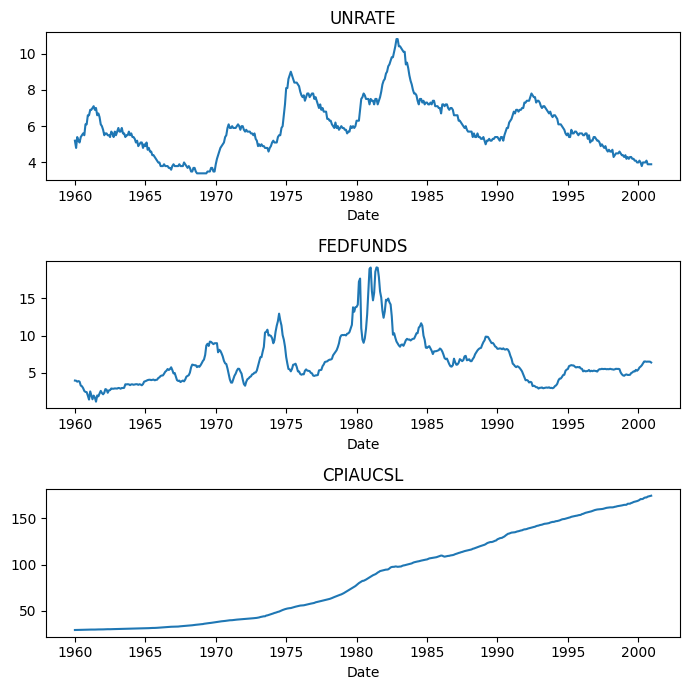

In [5]:
# Setting up the 3x1 layout
fig, axs = plt.subplots(3, 1, figsize=(7, 7))


# Plot UNRATE Time Series 
axs[0].plot(macrodata["UNRATE"])
axs[0].set_title("UNRATE")
axs[0].set_xlabel("Date")

# Plot FEDFUNDS Time Series 
axs[1].plot(macrodata["FEDFUNDS"])
axs[1].set_title("FEDFUNDS")
axs[1].set_xlabel("Date")

# Plot CPIAUCSL Time Series 
axs[2].plot(macrodata["CPIAUCSL"])
axs[2].set_title("CPIAUCSL")
axs[2].set_xlabel("Date")   

plt.tight_layout()
plt.show()

<h3> Find Best VAR(p) Model </h3>

In [6]:
# Determine the optimal VAR(p) order p  by different information criteria
results = VAR(macrodata).select_order(maxlags=12)

print("Optimal VAR order based on AIC:", results.aic)
print("Optimal VAR order based on HQ:", results.hqic)
print("Optimal VAR order based on BIC:", results.bic)
print("Optimal VAR order based on FPE:", results.fpe)

Optimal VAR order based on AIC: 12
Optimal VAR order based on HQ: 5
Optimal VAR order based on BIC: 2
Optimal VAR order based on FPE: 12


<h3> Fit VAR(2) Model Based on BIC Criterion </h3>

In [7]:
# Fit the VAR model using BIC Criterion
var_model = VAR(macrodata).fit(maxlags=results.bic, ic='bic', trend='c')
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jan, 2024
Time:                     00:31:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.87807
Nobs:                     490.000    HQIC:                  -7.98724
Log likelihood:          -90.6701    FPE:                0.000316613
AIC:                     -8.05783    Det(Omega_mle):     0.000303423
--------------------------------------------------------------------
Results for equation UNRATE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.023873         0.035582            0.671           0.502
L1.UNRATE           0.972402         0.045932           21.170           0.000
L1.FEDFUNDS        -0.029274         0.013634           -2.147     

<h3>  Impulse Response For Fitted VAR(2) Model </h3>

The impulse response function measure the impact of a unit innovation (impulse) in a given variable on all the dependent variables in the VAR model.

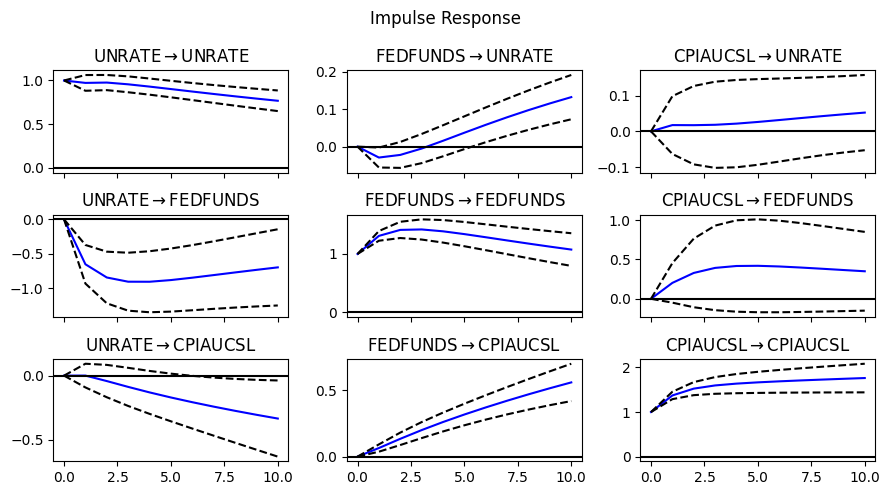

In [8]:
# Impulse Response Function (IRF)
irf = var_model.irf(10)

irf_plot = irf.plot()
irf_plot.suptitle('Impulse Response')
irf_plot.set_size_inches(9,5)

plt.tight_layout()
plt.show()

Interpreting the impulse response functions for the VAR model of the time series:

**When unemployment rises:** </br>
The Federal Funds rate is projected to decline (consistent with Federal Reserve Policy) </br>
The CPI decreases (lower employment results in less pressure to increase consumer prices)</br>

**When the Fed Funds rate increases:**</br>
The unemployment rate tends to increase; so reducing the Fed Funds rate would tend to reduce unemployment</br>
The CPI increases; increases in the Fed Funds rate are associated with increase in CPI over future quarters</br>

**When the CPI increases:**</br>
The Federal Funds rate tends to increase over subsequent quarters. This is consistent with Federal Reserve policy of raising interest rates to control for inflation.

<h2> First Differenced Time Series </h2>

In [9]:
differenced_macrodata = macrodata.diff().dropna()
print(differenced_macrodata.shape)

(491, 3)


<h3> Find Best VAR(p) Model </h3>

In [10]:
# Determine the optimal VAR(p) order p  by different information criteria
results = VAR(differenced_macrodata).select_order(maxlags=12)

print("Optimal VAR order based on AIC:", results.aic)
print("Optimal VAR order based on HQ:", results.hqic)
print("Optimal VAR order based on BIC:", results.bic)
print("Optimal VAR order based on FPE:", results.fpe)

Optimal VAR order based on AIC: 12
Optimal VAR order based on HQ: 3
Optimal VAR order based on BIC: 3
Optimal VAR order based on FPE: 12


<h3> Fit VAR(3) Model Based on BIC Criterion </h3>

In [11]:
# Fit the VAR model using BIC Criterion
var_model_differenced = VAR(differenced_macrodata).fit(maxlags=results.bic, ic='bic', trend='c')
print(var_model_differenced.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jan, 2024
Time:                     00:31:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.84862
Nobs:                     488.000    HQIC:                  -8.00504
Log likelihood:          -69.4074    FPE:                0.000301661
AIC:                     -8.10622    Det(Omega_mle):     0.000283851
--------------------------------------------------------------------
Results for equation UNRATE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.034334         0.013372           -2.568           0.010
L1.UNRATE          -0.007661         0.045643           -0.168           0.867
L1.FEDFUNDS        -0.010954         0.014642           -0.748     

<h3>  Impulse Response For Fitted VAR(3) Model </h3>

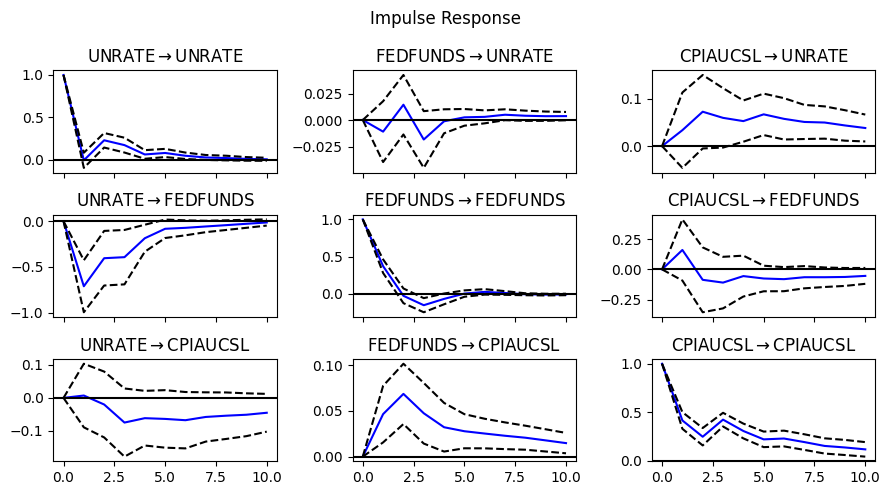

In [12]:
# Impulse Response Function (IRF)
irf = var_model_differenced.irf(10)

irf_plot = irf.plot()
irf_plot.suptitle('Impulse Response')
irf_plot.set_size_inches(9,5)

plt.tight_layout()
plt.show()

Interpreting the impulse response functions for the VAR model of the differenced time series:

**When unemployment increases:** </br>
The Fed Funds rate tends to decrease over subsequent quarters, consistent with Federal Reserve policies (i.e., stimulating economic growth and employment with lower interest rates). </br>
**When Fed Funds rate increases:** </br>
There is a modest increase in inflation (CPIA). This is consistent with the Fed raising rates to control inflation
which tends to persist for several quarters. </br>
**When inflation (CPIAUCSL) increases:** </br>
The unemployment tends to rise modestly, and the Fed Funds rate tends to increase.